In [1]:
# support vector machines ()

In [2]:
# imports for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# upload the dataset
df= pd.read_csv("C:\\classification problems\\cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [18]:
for col in df.columns:
    df[col].nunique()

In [6]:
df.drop("ID",axis= 1,inplace= True)

C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

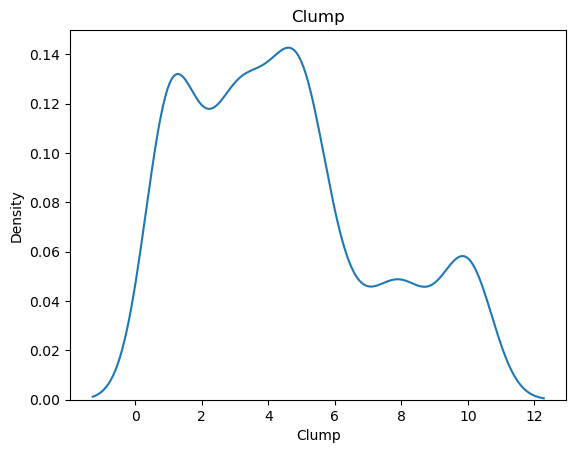

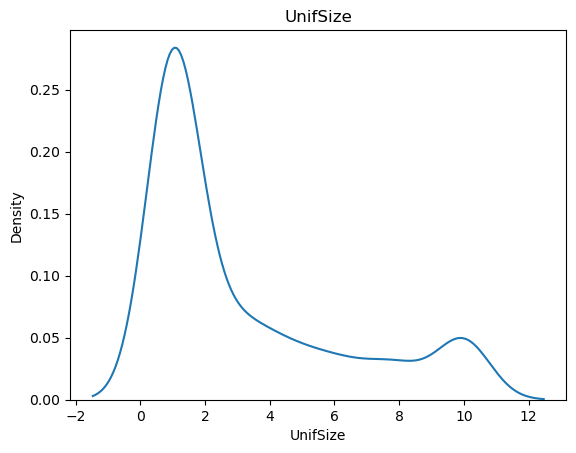

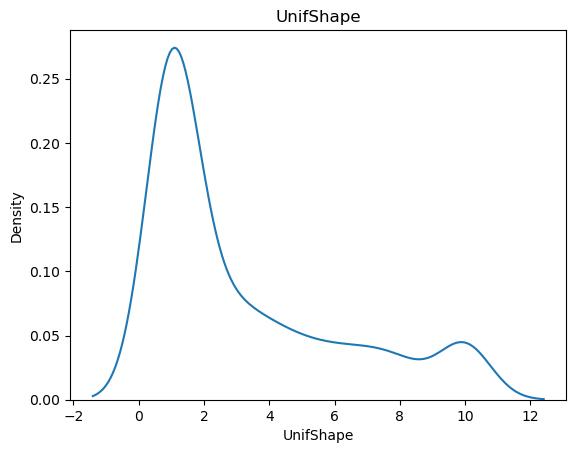

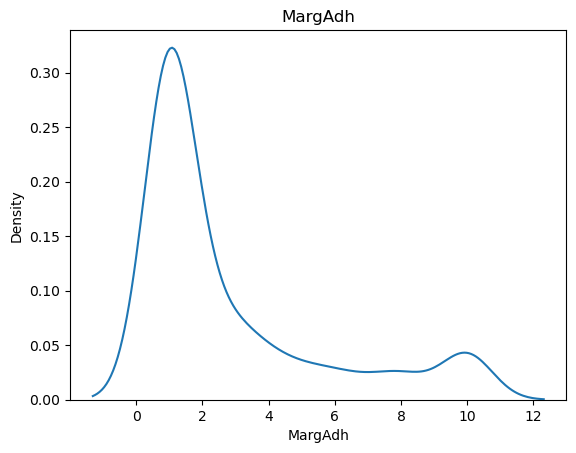

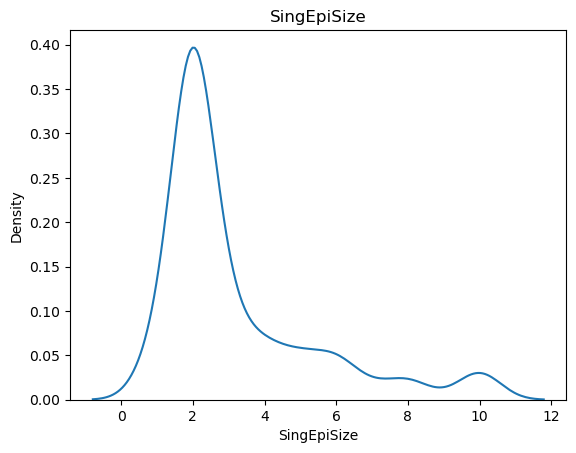

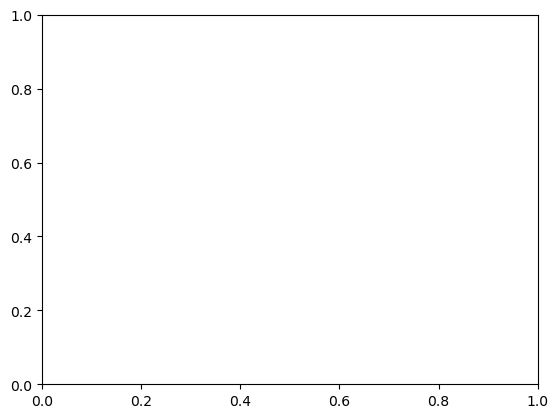

In [7]:
# check the distribution of the data for each column
for feature in df.columns:
    plt.figure()
    sns.kdeplot(data= df,x= feature)
    plt.title(feature)

In [12]:
df.drop_duplicates(inplace= True)

In [19]:
df.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [51]:
# divide the dataset into features(X) and labels(y)
X= df.drop("Class",axis= 1)
y= df.Class

In [55]:
# perform the train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.3)

In [56]:
# modelling support vector machine
from sklearn.svm import SVC
svm_model= SVC(kernel= "linear",gamma= "auto",C= 2)
# train the model with the training dataset
svm_model.fit(X_train,y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [47]:
mode= df.BareNuc.mode()[0]

In [50]:
df["BareNuc"]= df.BareNuc.astype(int)

In [57]:
# make predictions on the testing data
predictions= svm_model.predict(X_test)

In [59]:
# evaluation of the model
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           2       0.96      0.96      0.96        67
           4       0.96      0.96      0.96        72

    accuracy                           0.96       139
   macro avg       0.96      0.96      0.96       139
weighted avg       0.96      0.96      0.96       139

